In [1]:
import os
import sys
import shutil
import numpy as np
import pandas as pd
import pydicom as dicom
import matplotlib.pylab as plt
import SimpleITK as sitk
from datetime import datetime


In [2]:
%env SITK_SHOW_COMMAND "/home/andres/Downloads/Slicer-4.10.2-linux-amd64/Slicer"
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
dicom.config.convert_wrong_length_to_UN = True

env: SITK_SHOW_COMMAND="/home/andres/Downloads/Slicer-4.10.2-linux-amd64/Slicer"


In [3]:
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from Utils import utils

In [4]:
config = utils.read_config()
config

{'common': {'paths': {'source_path_wd': 'E:/U-CAN-Lymfom_A',
   'source_path_bd': 'F:/ucan_lymfom'}},
 'selection': {'filenames': {'rejected_folder_filename': 'Rejected_exams_from_U-CAN-Lymfom.xlsx',
   'sourcefiltered_folder_filename': 'SourceFiltered_exams_from_U-CAN-Lymfom.xlsx',
   'incomplete_folders_filename_initial': 'No_PTorCT_exams_from_U-CAN-Lymfom1.xlsx',
   'incomplete_folders_filename_final': 'No_PTorCT_exams_from_U-CAN-Lymfom2.xlsx',
   'selected_folders_beforefiltering_filename': 'Selected_exams_beforefiltering_from_U-CAN-Lymfom.xlsx',
   'selected_folders_afterfiltering_filename': 'Selected_exams_afterfiltering_from_U-CAN-Lymfom.xlsx',
   'final_selected_images_filename': 'FinalSelected_exams_from_U-CAN-Lymfom.xlsx',
   'list_of_distorted_images_filename': 'Distorted_exams_from_U-CAN-Lymfom.xlsx'}},
 'metadata': {'filenames': {'final_selected_images_filename': 'Finalized_dataset.xlsx'}},
 'resampling': {'voxel_spacing': [2, 2, 3], 'image_size': [256, 256, 256]},
 'proje

In [5]:
#source_path_wd = "/media/andres/T7 Shield1/U-CAN-Lymfom_A/Selected_for_UCAN_project"
#source_path_bd = "/media/andres/T7 Shield/ucan_lymfom"

source_path_wd = config['common']['paths']['source_path_wd']
source_path_bd = config['common']['paths']['source_path_bd']

master_data_wd_filename = config['metadata']['filenames']['final_selected_images_filename']
master_data_bd_filename = config['metadata']['filenames']['final_selected_images_filename']


In [6]:
final_selected_images_filename = config['selection']['filenames']['final_selected_images_filename']
final_selected_folders_bd = source_path_bd + '/' + final_selected_images_filename

In [7]:
# master_data for black disk
print("Reading master data for black disk")
master_data_bd = pd.read_excel(os.path.join(source_path_bd, master_data_wd_filename))
#master_data_wd[['system', 'npr', 'scan_date']]= master_data_wd['patient_directory'].str.split(pat='_|-', n=2, expand=True)
print(master_data_bd.shape)

master_data_bd.head(2)

Reading master data for black disk
(2264, 45)


,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,dicom_img,patient_id,patient_age,patient_weight,patient_size,imgsz_x,imgsz_y,num_slices,voxsz_x,voxsz_y,slice_thickness,image_size,voxel_size,img_pos,img_orient,for_uid,att_corr,recons_method,image_type,aquisition_dt,aquisition_time,study_desc,series_desc,protocol,corr_img,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time
0,0,2096,F:/ucan_lymfom/ASPTCTX0001_lpr385705046400-20140313/CT-20140313-152551-6.1_UAS-WB-FDG-3D-STANDARD_CT_RECON-3.750000mm,F:/ucan_lymfom,ASPTCTX0001_lpr385705046400-20140313,CT-20140313-152551-6.1_UAS-WB-FDG-3D-STANDARD_CT_RECON-3.750000mm,ASPTCTX0001,lpr385705046400,20140313,13743,1.2.840.113619.2.55.3.4240671514.332.1394175950.81.1,lpr385705046400,33.0,'69.0','1.73',512,512,215,0.976562,0.976562,3.75,"(512, 512, 215)","(0.976562, 0.976562, 3.75)","[-250.000, -250.000, 167.080]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]",1.2.840.113619.2.55.3.4240671514.332.1394175949.830.13830.1,NaN,NaN,"['ORIGINAL', 'PRIMARY', 'AXIAL']",'20140313','152608','FDG WB 1 h','STANDARD CT RECON','6.1 UAS-WB-FDG-3D',NaN,CT,'GE MEDICAL SYSTEMS','Discovery STE',NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2095,F:/ucan_lymfom/ASPTCTX0001_lpr385705046400-20140313/PT-20140313-152728-UAS-WB-FDG-3D-UAS-WB-FDG-3D-AC-3.2700mm,F:/ucan_lymfom,ASPTCTX0001_lpr385705046400-20140313,PT-20140313-152728-UAS-WB-FDG-3D-UAS-WB-FDG-3D-AC-3.2700mm,ASPTCTX0001,lpr385705046400,20140313,13745,1.2.840.113619.2.131.4240671514.1394722651.463822,lpr385705046400,33.0,'69.0','1.73',128,128,247,3.906250,3.906250,3.27,"(128, 128, 247)","(3.90625, 3.90625, 3.27)","[-248.04687500000, -248.04687500000, 169.020004272460]","[1, 0, 0, 0, 1, -0]",1.2.840.113619.2.55.3.4240671514.332.1394175949.830.13830.1,"'measured,, 0.096000 cm-1,'",'3D IR',"['ORIGINAL', 'PRIMARY']",'20140313','154238','FDG WB 1 h','UAS-WB-FDG-3D-AC','UAS-WB-FDG-3D',"['DECY', 'ATTN', 'SCAT', 'DTIM', 'RAN', 'DCAL', 'SLSENS', 'NORM']",PT,'GE MEDICAL SYSTEMS','Discovery STE','FDG -- fluorodeoxyglucose','0.0','141400.00','259344912.0','6588.0','0.97000002861023','20140313141400.00'


In [8]:
#(2264 / 25) * 2 -> 181.12 Gb

In [9]:
misclassified_df = pd.read_excel(source_path_bd + '/MisclassifiedSelected_files.xlsx')
misclassified_df[['source_directory', 'patient_directory', 'PET-CT_info']] = misclassified_df['directory'].str.rsplit(pat='/', n=2, expand=True)
misclassified_patient_directory_list = misclassified_df.patient_directory.to_list()
misclassified_df.head()

,Unnamed: 0,directory,count,source_directory,patient_directory,PET-CT_info
0,284,F:/ucan_lymfom/ASPTCTX0001_npr196644347217-20161125/CT-20161125-114603-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.958984mm,1,F:/ucan_lymfom,ASPTCTX0001_npr196644347217-20161125,CT-20161125-114603-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.958984mm
1,750,F:/ucan_lymfom/ASPTCTX0001_npr338511978351-20170201/CT-20170201-122546-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.953125mm,1,F:/ucan_lymfom,ASPTCTX0001_npr338511978351-20170201,CT-20170201-122546-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.953125mm
2,1398,F:/ucan_lymfom/ASPTCTX0001_npr567278394863-20151103/CT-20151103-130218-6.3_UAS-WB-FDG-3D_CT_THORAX-BUK_VENFAS_20141209-HELKROPP_VENFAS_AX_1MM-0.976562mm,1,F:/ucan_lymfom,ASPTCTX0001_npr567278394863-20151103,CT-20151103-130218-6.3_UAS-WB-FDG-3D_CT_THORAX-BUK_VENFAS_20141209-HELKROPP_VENFAS_AX_1MM-0.976562mm
3,1412,F:/ucan_lymfom/ASPTCTX0001_npr574436824692-20170222/CT-20170222-104855-6.6_UAS-WB-FDG-3D_VENFASTHORAX_INSP_20160120-WB_VEN_AX-0.951172mm,1,F:/ucan_lymfom,ASPTCTX0001_npr574436824692-20170222,CT-20170222-104855-6.6_UAS-WB-FDG-3D_VENFASTHORAX_INSP_20160120-WB_VEN_AX-0.951172mm
4,1682,F:/ucan_lymfom/ASPTCTX0001_npr676639996732-20180928/CT-20180928-150052-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.976562mm,1,F:/ucan_lymfom,ASPTCTX0001_npr676639996732-20180928,CT-20180928-150052-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.976562mm


In [10]:
master_data_bd[np.logical_and(master_data_bd.num_slices >200,master_data_bd.num_slices < 250)].head(2) # 488

,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,dicom_img,patient_id,patient_age,patient_weight,patient_size,imgsz_x,imgsz_y,num_slices,voxsz_x,voxsz_y,slice_thickness,image_size,voxel_size,img_pos,img_orient,for_uid,att_corr,recons_method,image_type,aquisition_dt,aquisition_time,study_desc,series_desc,protocol,corr_img,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time
0,0,2096,F:/ucan_lymfom/ASPTCTX0001_lpr385705046400-20140313/CT-20140313-152551-6.1_UAS-WB-FDG-3D-STANDARD_CT_RECON-3.750000mm,F:/ucan_lymfom,ASPTCTX0001_lpr385705046400-20140313,CT-20140313-152551-6.1_UAS-WB-FDG-3D-STANDARD_CT_RECON-3.750000mm,ASPTCTX0001,lpr385705046400,20140313,13743,1.2.840.113619.2.55.3.4240671514.332.1394175950.81.1,lpr385705046400,33.0,'69.0','1.73',512,512,215,0.976562,0.976562,3.75,"(512, 512, 215)","(0.976562, 0.976562, 3.75)","[-250.000, -250.000, 167.080]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]",1.2.840.113619.2.55.3.4240671514.332.1394175949.830.13830.1,NaN,NaN,"['ORIGINAL', 'PRIMARY', 'AXIAL']",'20140313','152608','FDG WB 1 h','STANDARD CT RECON','6.1 UAS-WB-FDG-3D',NaN,CT,'GE MEDICAL SYSTEMS','Discovery STE',NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2095,F:/ucan_lymfom/ASPTCTX0001_lpr385705046400-20140313/PT-20140313-152728-UAS-WB-FDG-3D-UAS-WB-FDG-3D-AC-3.2700mm,F:/ucan_lymfom,ASPTCTX0001_lpr385705046400-20140313,PT-20140313-152728-UAS-WB-FDG-3D-UAS-WB-FDG-3D-AC-3.2700mm,ASPTCTX0001,lpr385705046400,20140313,13745,1.2.840.113619.2.131.4240671514.1394722651.463822,lpr385705046400,33.0,'69.0','1.73',128,128,247,3.906250,3.906250,3.27,"(128, 128, 247)","(3.90625, 3.90625, 3.27)","[-248.04687500000, -248.04687500000, 169.020004272460]","[1, 0, 0, 0, 1, -0]",1.2.840.113619.2.55.3.4240671514.332.1394175949.830.13830.1,"'measured,, 0.096000 cm-1,'",'3D IR',"['ORIGINAL', 'PRIMARY']",'20140313','154238','FDG WB 1 h','UAS-WB-FDG-3D-AC','UAS-WB-FDG-3D',"['DECY', 'ATTN', 'SCAT', 'DTIM', 'RAN', 'DCAL', 'SLSENS', 'NORM']",PT,'GE MEDICAL SYSTEMS','Discovery STE','FDG -- fluorodeoxyglucose','0.0','141400.00','259344912.0','6588.0','0.97000002861023','20140313141400.00'


In [11]:
exams_with_lt250 = master_data_bd[master_data_bd.num_slices < 250].patient_directory.to_list()
len(exams_with_lt250)

499

In [12]:
master_data_bd_filtered = master_data_bd[~np.logical_or(master_data_bd.patient_directory.isin(exams_with_lt250), master_data_bd.patient_directory.isin(misclassified_patient_directory_list))].copy().reset_index()
master_data_bd_filtered.shape

(1560, 46)

In [13]:
master_data_bd_filtered.patient_directory.nunique()

780

In [14]:
config_size = config['resampling']['image_size']
config_spacing = config['resampling']['voxel_spacing']
print('config_size: ', config_size)
print('config_spacing: ', config_spacing)

config_size:  [256, 256, 256]
config_spacing:  [2, 2, 3]


In [15]:
sample_SUV_image = sitk.ReadImage('F:/SUV.nii.gz')
print(sample_SUV_image.GetSize())
config_spacing = list(sample_SUV_image.GetSpacing())
config_spacing

(400, 400, 326)


[2.0364201068878174, 2.0364201068878174, 3.0]

In [16]:
#clip positive values at +3000
#set outside image 0 values to -1024

In [17]:
master_data_bd_filtered.head(2)

,index,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,dicom_img,patient_id,patient_age,patient_weight,patient_size,imgsz_x,imgsz_y,num_slices,voxsz_x,voxsz_y,slice_thickness,image_size,voxel_size,img_pos,img_orient,for_uid,att_corr,recons_method,image_type,aquisition_dt,aquisition_time,study_desc,series_desc,protocol,corr_img,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time
0,2,2,948,F:/ucan_lymfom/ASPTCTX0001_lpr415675513429-20190201/CT-20190201-103111-3.5_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm,F:/ucan_lymfom,ASPTCTX0001_lpr415675513429-20190201,CT-20190201-103111-3.5_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm,ASPTCTX0001,lpr415675513429,20190201,14250,1.2.840.113619.2.5.91447938.12625.1549010475.262,lpr415675513429,32.0,'90.0','1.8',512,512,382,0.962891,0.962891,3.00,"(512, 512, 382)","(0.962891, 0.962891, 3.0)","[-249.237, -234.463, -127.315]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]",1.2.840.113619.2.405.3.3842663696.892.1549005827.841.4795.1,NaN,NaN,"['DERIVED', 'SECONDARY', 'REFORMATTED', 'AVERAGE']",'20190201','102917.254016','PET FDG WB 1 h','WB Venfas 3 ax','3.5 WB_FDG CT VENFAS',NaN,CT,'GE MEDICAL SYSTEMS','Discovery MI',NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,3,947,F:/ucan_lymfom/ASPTCTX0001_lpr415675513429-20190201/PT-20190201-101500-3.5_WB_FDG_CT_VENFAS-QCFX-S_400-2.7900mm,F:/ucan_lymfom,ASPTCTX0001_lpr415675513429-20190201,PT-20190201-101500-3.5_WB_FDG_CT_VENFAS-QCFX-S_400-2.7900mm,ASPTCTX0001,lpr415675513429,20190201,14246,1.2.840.113619.2.405.3842663696.1549013394.986841,lpr415675513429,32.0,'90.0','1.8',256,256,341,1.953125,1.953125,2.79,"(256, 256, 341)","(1.953125, 1.953125, 2.79)","[-249.02343750000, -249.02343750000, -128.24998474121]","[1, 0, 0, 0, 1, -0]",1.2.840.113619.2.405.3.3842663696.892.1549005827.841.4795.1,"'measured,, 0.000000 cm-1, attenuation smooth'",'QCFX',"['ORIGINAL', 'PRIMARY']",'20190201','102509','PET FDG WB 1 h','QCFX-S 400','3.5 WB_FDG CT VENFAS',"['DECY', 'ATTN', 'SCAT', 'DTIM', 'RANSNG', 'DCAL', 'SLSENS', 'NORM']",PT,'GE MEDICAL SYSTEMS','Discovery MI','FDG -- fluorodeoxyglucose','0.0','090500.00','264312992.0','6586.2001953125','0.96700000762939','20190201090500.00'


In [18]:
master_data_bd_filtered = master_data_bd_filtered.sort_values(by=["patient_directory"	,"PET-CT_info"], ascending=[True, False])
master_data_bd_filtered.head(2)

,index,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,dicom_img,patient_id,patient_age,patient_weight,patient_size,imgsz_x,imgsz_y,num_slices,voxsz_x,voxsz_y,slice_thickness,image_size,voxel_size,img_pos,img_orient,for_uid,att_corr,recons_method,image_type,aquisition_dt,aquisition_time,study_desc,series_desc,protocol,corr_img,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time
1,3,3,947,F:/ucan_lymfom/ASPTCTX0001_lpr415675513429-20190201/PT-20190201-101500-3.5_WB_FDG_CT_VENFAS-QCFX-S_400-2.7900mm,F:/ucan_lymfom,ASPTCTX0001_lpr415675513429-20190201,PT-20190201-101500-3.5_WB_FDG_CT_VENFAS-QCFX-S_400-2.7900mm,ASPTCTX0001,lpr415675513429,20190201,14246,1.2.840.113619.2.405.3842663696.1549013394.986841,lpr415675513429,32.0,'90.0','1.8',256,256,341,1.953125,1.953125,2.79,"(256, 256, 341)","(1.953125, 1.953125, 2.79)","[-249.02343750000, -249.02343750000, -128.24998474121]","[1, 0, 0, 0, 1, -0]",1.2.840.113619.2.405.3.3842663696.892.1549005827.841.4795.1,"'measured,, 0.000000 cm-1, attenuation smooth'",'QCFX',"['ORIGINAL', 'PRIMARY']",'20190201','102509','PET FDG WB 1 h','QCFX-S 400','3.5 WB_FDG CT VENFAS',"['DECY', 'ATTN', 'SCAT', 'DTIM', 'RANSNG', 'DCAL', 'SLSENS', 'NORM']",PT,'GE MEDICAL SYSTEMS','Discovery MI','FDG -- fluorodeoxyglucose','0.0','090500.00','264312992.0','6586.2001953125','0.96700000762939','20190201090500.00'
0,2,2,948,F:/ucan_lymfom/ASPTCTX0001_lpr415675513429-20190201/CT-20190201-103111-3.5_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm,F:/ucan_lymfom,ASPTCTX0001_lpr415675513429-20190201,CT-20190201-103111-3.5_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm,ASPTCTX0001,lpr415675513429,20190201,14250,1.2.840.113619.2.5.91447938.12625.1549010475.262,lpr415675513429,32.0,'90.0','1.8',512,512,382,0.962891,0.962891,3.00,"(512, 512, 382)","(0.962891, 0.962891, 3.0)","[-249.237, -234.463, -127.315]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]",1.2.840.113619.2.405.3.3842663696.892.1549005827.841.4795.1,NaN,NaN,"['DERIVED', 'SECONDARY', 'REFORMATTED', 'AVERAGE']",'20190201','102917.254016','PET FDG WB 1 h','WB Venfas 3 ax','3.5 WB_FDG CT VENFAS',NaN,CT,'GE MEDICAL SYSTEMS','Discovery MI',NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
exception_lst = []
resampled_SUV_CT = {'patient_directory' : [],
                    'SUV': [],
                    'CT' : [],
                    'new_size' : []}
                    #'SUV_arr': []}

for index, row in master_data_bd_filtered.iterrows():
    #print(index, row['patient_directory'], row['PET-CT_info'])
    if index == 20:
        break
    
    #create patient directories
    #npr_directories = 'E:/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/' + str(row['npr']) + '_SUV_CT/'
    npr_directories = 'F:/ucan_lymfom/Resampled_SUV_CT/Sample30Oct2023/' + str(row['npr']) + '_SUV_CT/'
    if not os.path.exists(npr_directories):
        os.mkdir(npr_directories)
    
    #create scan date directories
    #scan_date_directories = 'E:/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/'
    scan_date_directories = 'F:/ucan_lymfom/Resampled_SUV_CT/Sample30Oct2023/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/'
    if not os.path.exists(scan_date_directories):
        os.mkdir(scan_date_directories)
        
    if row['modality']=='PT':

        resampled_SUV_CT['patient_directory'].append(row['patient_directory'])

        vol_img = utils.read_dicom(row['directory'])
        image_size = vol_img.GetSize()

        new_size = [config_size[0], config_size[1], image_size[2]]
        resampled_SUV_CT['new_size'].append(new_size)
        #print(new_size)   

        vol_img = sitk.Resample(vol_img, new_size, sitk.Transform(), sitk.sitkNearestNeighbor, #sitk.sitkLinear, 
                            vol_img.GetOrigin(), config_spacing, vol_img.GetDirection(), 0,
                            vol_img.GetPixelID())  
        
        PatientWeight = float(row['patient_weight'].replace("'", "").replace(" ", ""))

        AcquisitionTime = str(row['aquisition_time'])
        AcquisitionTime = AcquisitionTime.replace("'","").strip()

        # Start Time for the Radiopharmaceutical Injection
        RadiopharmaceuticalStartTime = row['radiopharmaceutical_start_time'].split('.')[0].replace("'","").strip()

        # Half Life for Radionuclide # seconds
        RadionuclideHalfLife = row['radionuclide_half_life'].replace("'","").strip()

        # Total dose injected for Radionuclide
        RadionuclideTotalDose = row['radionuclide_total_dose'].replace("'","").strip()

        suv, estimated, raw,spacing,origin,direction = utils.compute_suv(vol_img, PatientWeight, AcquisitionTime, RadiopharmaceuticalStartTime, RadionuclideHalfLife, RadionuclideTotalDose)
        suv_img = sitk.GetImageFromArray(suv)

        suv_img.SetSpacing(config_spacing)

        #suv_img = sitk.Resample(suv_img, new_size, sitk.Transform(), sitk.sitkLinear,
        #                    suv_img.GetOrigin(), config_spacing, suv_img.GetDirection(), 0,
        #                   suv_img.GetPixelID())
        
        resampled_SUV_CT['SUV'].append(row['PET-CT_info'])
        resampled_SUV_CT['CT'].append('')
        #resampled_SUV_CT['SUV_arr'].append(sitk.GetArrayFromImage(suv_img))

        #save_path= 'E:/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'SUV'
        save_path= 'F:/ucan_lymfom/Resampled_SUV_CT/Sample30Oct2023/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'SUV'

        utils.save_as_gz(suv_img, save_path+'.nii.gz')
        
resampled_SUV_CT_df = pd.DataFrame(resampled_SUV_CT)
#resampled_SUV_CT_df.head(2)

In [23]:
for index, row in master_data_bd_filtered.iterrows():
    #print(index, row['patient_directory'], row['PET-CT_info'])
    if index == 20:
        break
    
    if row['modality']=='CT':  
        #print(row[['patient_directory']])      
        resampled_SUV_CT_df.loc[resampled_SUV_CT_df['patient_directory'] == row['patient_directory'], 'CT'] = row['PET-CT_info']

        vol_img = utils.read_dicom(row['directory'])
        image_size = vol_img.GetSize()

        new_size = resampled_SUV_CT_df.loc[resampled_SUV_CT_df['patient_directory'] == row['patient_directory'], 'new_size'].tolist()[0]

        #suv_img = sitk.ReadImage('E:/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'SUV' + '.nii.gz')
        suv_img = sitk.ReadImage('F:/ucan_lymfom/Resampled_SUV_CT/Sample30Oct2023/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'SUV' + '.nii.gz')

        vol_img = sitk.Resample(vol_img, new_size, sitk.Transform(), sitk.sitkNearestNeighbor, #sitk.sitkLinear,
                            vol_img.GetOrigin(), config_spacing, vol_img.GetDirection(), -1024,
                            vol_img.GetPixelID())
        
        vol_img.SetOrigin(suv_img.GetOrigin())
        
        #vol_img = sitk.Clamp(vol_img,upperBound=3000)

        #save_path= 'E:/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'CT'
        save_path= 'F:/ucan_lymfom/Resampled_SUV_CT/Sample30Oct2023/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'CT'

        utils.save_as_gz(vol_img, save_path+'.nii.gz')
        
#resampled_SUV_CT_df.head(2)

In [ ]:
### Correct origin

In [268]:
sample_CT = sitk.ReadImage('E:/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/lpr415675513429_SUV_CT/20190201/CT.nii.gz')
sample_SUV = sitk.ReadImage('E:/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/lpr415675513429_SUV_CT/20190201/SUV.nii.gz')

In [270]:
print(sample_CT.GetSize())
print(sample_CT.GetSpacing())
print(sample_CT.GetOrigin())
print(sample_CT.GetDirection())
print(sample_SUV.GetSize())
print(sample_SUV.GetSpacing())
print(sample_SUV.GetOrigin())
print(sample_SUV.GetDirection())

(256, 256, 341)
(2.0364201068878174, 2.0364201068878174, 3.0)
(0.0, 0.0, 0.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(256, 256, 341)
(2.0364201068878174, 2.0364201068878174, 3.0)
(0.0, 0.0, 0.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [165]:
#sample_CT = sitk.Clamp(sample_CT,upperBound=3000)
#utils.save_as_gz(sample_CT, save_path+'2.nii.gz')
sample_CT_arr = sitk.GetArrayFromImage(sample_CT)
print(sample_CT_arr.max())

(sample_CT_arr.min())

3000


-1024

In [167]:
sample_CT_arr.size

22347776

In [168]:
sample_CT_arr[sample_CT_arr==0].size

3737773

TypeError: Invalid shape (256, 256, 341) for image data

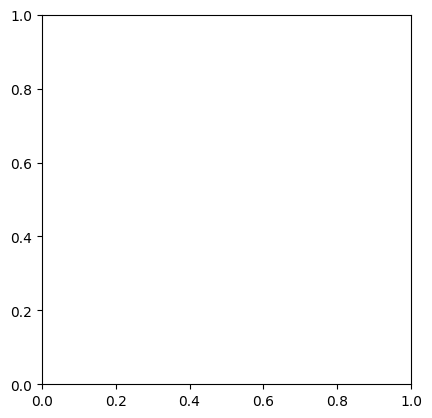

In [129]:
plt.imshow(sample_CT_arr.transpose(1,2,0))